In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import keras
from keras.layers import Dense, Flatten, BatchNormalization, Activation, Dropout
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from sklearn.model_selection import train_test_split

from keras.models import model_from_json

import matplotlib.pyplot as plt

import matplotlib.image as mpimg

import cv2

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("input"))

# Any results you write to the current directory are saved as output.

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


['.DS_Store', 'IdLookupTable.csv', 'SampleSubmission.csv', 'test', 'test.zip', 'training', 'training.zip']


In [3]:
test = pd.read_csv('input/test/test.csv')

In [4]:
def plot_pupils(image, left_x, left_y, right_x, right_y):
    plt.figure()
    plt.imshow(image,cmap='gray')
    plt.scatter(left_x, left_y, s=5, c='red', marker='o')
    plt.scatter(right_x, right_y, s=5, c='red', marker='o')
    plt.show()

In [5]:
ntest = test.shape[0]
image = []
for i in range (0,ntest):
    img = test['Image'][i].split(' ')
    img = [0 if x =='' else x for x in img]
    image.append(img)
image_list = np.array(image,dtype = 'float')
test_data = image_list.reshape(-1,96,96,1)
test_data = test_data/255

In [6]:
test_data[0,:,:,0]

array([[0.71372549, 0.71764706, 0.71372549, ..., 0.71372549, 0.71372549,
        0.71372549],
       [0.71372549, 0.70980392, 0.70980392, ..., 0.71372549, 0.71372549,
        0.71372549],
       [0.71372549, 0.70980392, 0.70588235, ..., 0.71372549, 0.70980392,
        0.71372549],
       ...,
       [0.16470588, 0.14117647, 0.07843137, ..., 0.49411765, 0.53333333,
        0.6       ],
       [0.12156863, 0.03137255, 0.        , ..., 0.03529412, 0.04313725,
        0.12941176],
       [0.01176471, 0.        , 0.00392157, ..., 0.03137255, 0.01960784,
        0.01960784]])

In [7]:
test_data[0,:,:,0].shape

(96, 96)

In [8]:
img_test  = cv2.imread('yuri_phone.jpg',0)/255

In [9]:
img_test

array([[0.14117647, 0.14509804, 0.14509804, ..., 0.16078431, 0.16078431,
        0.16078431],
       [0.14117647, 0.14117647, 0.14117647, ..., 0.16078431, 0.16078431,
        0.16078431],
       [0.14901961, 0.14509804, 0.14509804, ..., 0.16078431, 0.16078431,
        0.16470588],
       ...,
       [0.0627451 , 0.05882353, 0.05490196, ..., 0.09019608, 0.09019608,
        0.09411765],
       [0.0627451 , 0.0627451 , 0.05882353, ..., 0.09411765, 0.09019608,
        0.09019608],
       [0.05882353, 0.0627451 , 0.05882353, ..., 0.09019608, 0.09019608,
        0.08627451]])

In [10]:
img_test.shape

(3840, 2160)

In [11]:
dim = (96, 96)
resized = cv2.resize(img_test, dim, interpolation = cv2.INTER_AREA)

In [12]:
resized.shape

(96, 96)

In [13]:
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)
# load weights into new model
model.load_weights("model_weights.h5")
print("Loaded model from disk")

Loaded model from disk


In [14]:
image1 = []
image1.append(resized)
image_list1 = np.array(image1,dtype = 'float')
test_data1 = image_list1.reshape(-1,96,96,1)

In [35]:
def transform_to_model(image):
    imgage = image/255
    dim = (96, 96)
    resized = cv2.resize(imgage, dim, interpolation = cv2.INTER_AREA)
    image1 = []
    image1.append(resized)
    image_list1 = np.array(image1,dtype = 'float')
    test_data1 = image_list1.reshape(-1,96,96,1)
    return test_data1

In [15]:
y_pred1 = model.predict(test_data1)

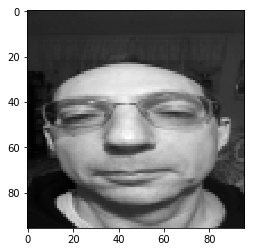

In [16]:
plt.imshow(resized,cmap='gray')

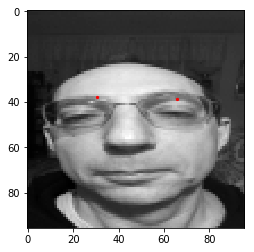

In [17]:
plot_pupils(test_data1[0,:,:,0],y_pred1[0,0], y_pred1[0,1],y_pred1[0,2], y_pred1[0,3])

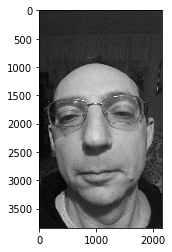

In [18]:
plt.imshow(img_test,cmap='gray')

In [40]:
img_test  = cv2.imread('../from_drop_box/Aaron Eldridge PD.jpg',0)

In [41]:
#img_test  = cv2.imread('yuri_phone.jpg',0)

In [42]:
test_data1 = transform_to_model(img_test)

In [43]:
y_pred1 = model.predict(test_data1)

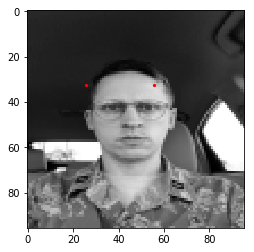

In [44]:
plot_pupils(test_data1[0,:,:,0],y_pred1[0,0], y_pred1[0,1],y_pred1[0,2], y_pred1[0,3])

In [22]:
img_test.shape

(2320, 1743)

In [20]:
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)
# load weights into new model
model.load_weights("model_weights.h5")
print("Loaded model from disk")

Loaded model from disk


In [21]:
#predicting test_data
y_pred = model.predict(test_data)

In [37]:
y_pred[0,:]

array([59.681545, 33.02375 , 27.458073, 34.48168 , 53.72179 , 34.234653,
       66.06556 , 33.590366, 33.56449 , 35.02834 , 20.578636, 35.56197 ,
       50.615322, 26.553715, 71.81781 , 26.699017, 35.625145, 27.408232,
       14.518087, 29.08593 , 45.09018 , 52.590275, 59.079494, 67.5261  ,
       31.051811, 68.92767 , 44.60036 , 65.3685  , 45.17987 , 73.778824],
      dtype=float32)

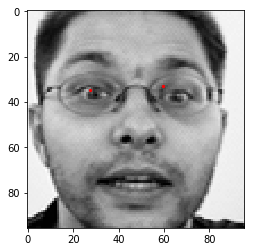

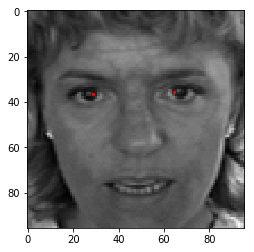

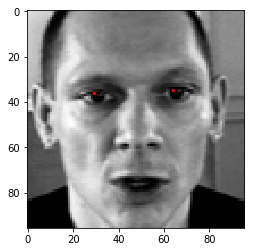

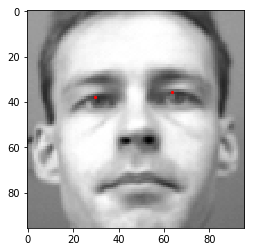

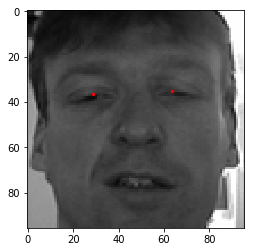

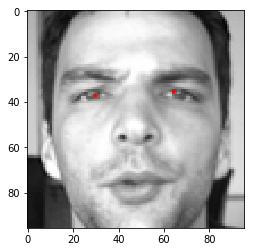

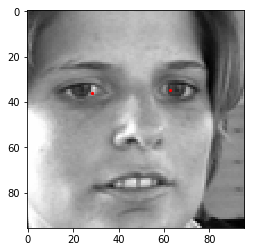

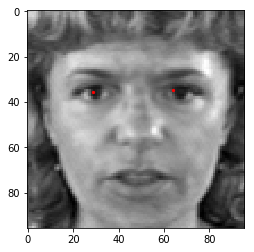

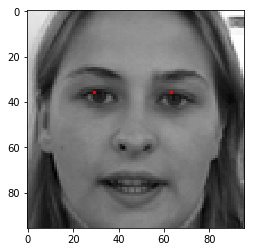

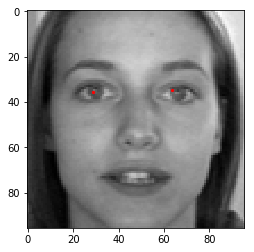

In [38]:
for i in range(10):

    plot_pupils(test_data[i,:,:,0],y_pred[i,0], y_pred[i,1],y_pred[i,2], y_pred[i,3])